In [103]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [104]:
# Cek GPU
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [105]:
# Path dataset asli
original_dataset_dir = "dataset" 
output_train_dir = "dataset_split/train"
output_val_dir = "dataset_split/validation"

In [106]:
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_val_dir, exist_ok=True)

In [107]:
categories = os.listdir(original_dataset_dir)  # Folder kategori
for category in categories:
    category_path = os.path.join(original_dataset_dir, category)
    if not os.path.isdir(category_path):
        continue

    # Ambil semua file dalam kategori
    images = os.listdir(category_path)

    # Split dataset menjadi train dan validation (80%-20%)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Path output untuk setiap kategori
    train_category_dir = os.path.join(output_train_dir, category)
    val_category_dir = os.path.join(output_val_dir, category)

    # Membuat folder kategori di train dan validation
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)

    # Pindahkan file ke folder train
    for image in train_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(train_category_dir, image)
        shutil.copy(src, dst)

    # Pindahkan file ke folder validation
    for image in val_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(val_category_dir, image)
        shutil.copy(src, dst)

print("Dataset successfully split into train and validation sets!")

Dataset successfully split into train and validation sets!


In [108]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [109]:
# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [110]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [111]:
# Load dataset
train_data = train_datagen.flow_from_directory(
    output_train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2019 images belonging to 6 classes.


In [112]:
val_data = val_datagen.flow_from_directory(
    output_val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 508 images belonging to 6 classes.


In [ ]:
# Membuat model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 kategori sampah
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\musta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
import PIL
# Callback untuk menghentikan pelatihan jika validasi tidak meningkat
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)

C:\Users\musta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 374ms/step - accuracy: 0.2150 - loss: 1.7920 - val_accuracy: 0.3130 - val_loss: 1.6250
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.3665 - loss: 1.5232 - val_accuracy: 0.4567 - val_loss: 1.4200
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.4341 - loss: 1.4034 - val_accuracy: 0.4449 - val_loss: 1.3626
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.4642 - loss: 1.3591 - val_accuracy: 0.4370 - val_loss: 1.3820
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.4564 - loss: 1.3646 - val_accuracy: 0.4626 - val_loss: 1.2732
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5196 - loss: 1.2351 - val_accuracy: 0.5354 - val_loss: 1.2268
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.5332 - loss: 1.1730 - val_accuracy: 0.4685 - val_loss: 1.3530
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.5174 - loss: 1.2818 - val_accuracy

In [115]:
# Evaluasi model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6331 - loss: 0.9722
Validation Loss: 1.0165791511535645
Validation Accuracy: 0.6161417365074158


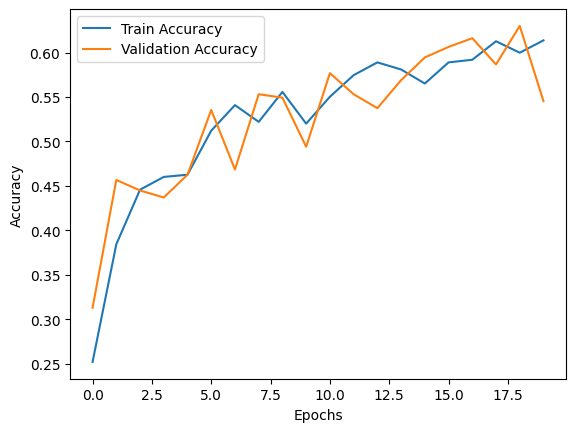

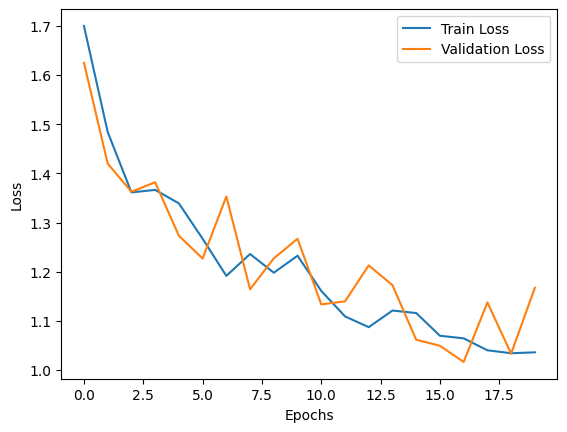

In [116]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()